<a href="https://colab.research.google.com/github/stephiioo/datasci_6_regression/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. dataset & packages

In [32]:
# bring in packages for dataframe + stats

import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
from statsmodels.stats.diagnostic import het_goldfeldquandt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# load in packages
heart = pd.read_csv('/content/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
# check for missing values

missing_values = heart.isna().sum()

# calculate the percentage of missing values
percentage_missing = (missing_values / len(heart)) * 100

# Display of the results
print("Missing Values:")
print(missing_values)
print("\nPercent of Missing Values:")
print(percentage_missing)

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Percent of Missing Values:
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [35]:
# Remove duplicate rows
heart_no_duplicates = heart.drop_duplicates()

# Check for duplicate columns
duplicate_columns = heart_no_duplicates.columns[heart_no_duplicates.columns.duplicated()]

# Remove duplicate columns
heart_no_duplicate_columns = heart_no_duplicates[heart_no_duplicates.columns[~heart_no_duplicates.columns.duplicated()]]

In [36]:
# Clean the column names
heart.columns = heart.columns.str.lower()
heart.columns = heart.columns.str.strip()
heart.columns = heart.columns.str.replace(' ', '_')
heart.columns = heart.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Print the updated column names
print(heart.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## 2. simple linear regression


### independent variable: resting bp

### dependent variable: cholesterol

In [37]:
# fit the regression model

X = sm.add_constant(heart['trestbps'])
model = sm.OLS(heart['chol'], X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.637
Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0321
Time:                        23:27:50   Log-Likelihood:                -1623.4
No. Observations:                 303   AIC:                             3251.
Df Residuals:                     301   BIC:                             3258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.3505     22.446      8.837      0.0

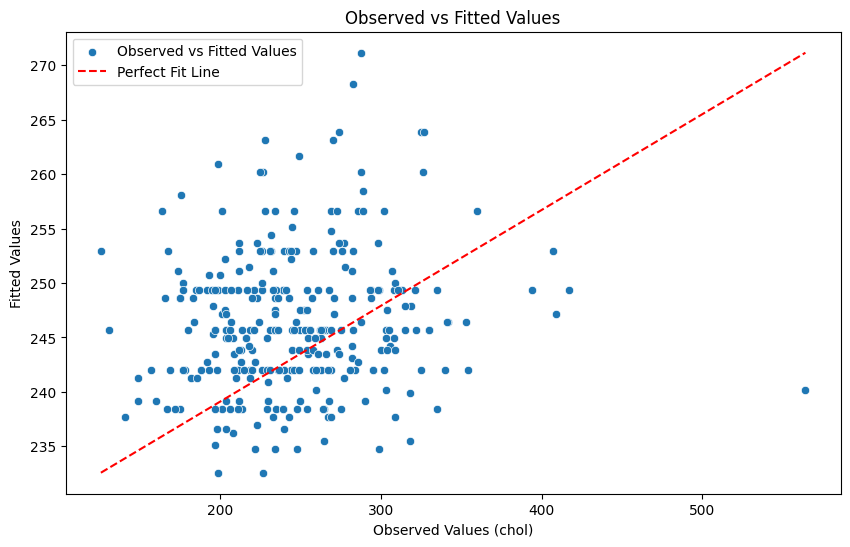

In [38]:
# Visualize the regression line alongside data points

plt.figure(figsize=(10, 6))

X = sm.add_constant(heart['trestbps'])
model = sm.OLS(heart['chol'], X)
results = model.fit()

fitted = results.fittedvalues

sns.scatterplot(x=heart['chol'], y=fitted, label='Observed vs Fitted Values')

plt.plot([min(heart['chol']), max(heart['chol'])], [min(fitted), max(fitted)], color='red', linestyle='--', label='Perfect Fit Line')

plt.xlabel('Observed Values (chol)')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.legend()
plt.show()


Shapiro-Wilk Test: W=0.9442473649978638, p-value=2.731196602212549e-09


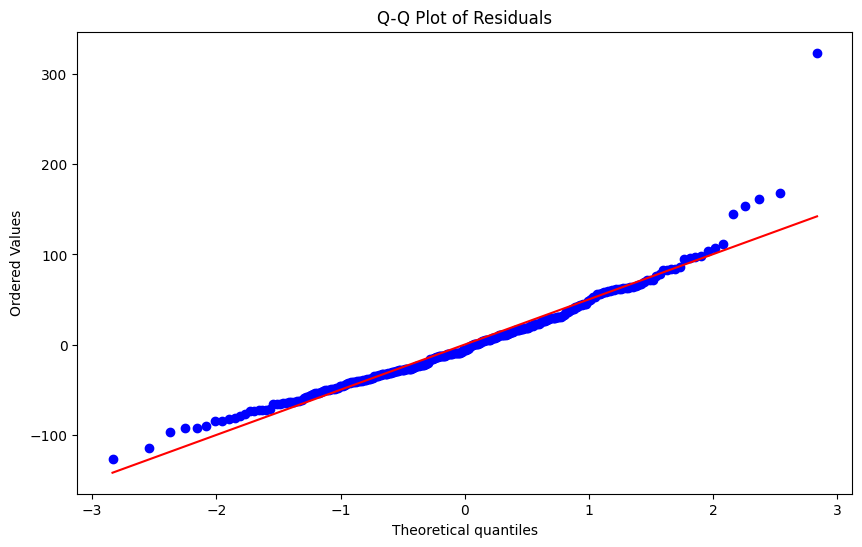

In [39]:
# assess normality of residuals

X = sm.add_constant(heart['trestbps'])
model = sm.OLS(heart['chol'], X)
results = model.fit()

# Residuals
residuals = results.resid

# Assess normality of residuals using Shapiro-Wilk test
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [40]:
# Assessing linearity of the relationship

stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.827318372949827, p-value=0.8771453503544085


In [41]:
# Assess homogeneity of variance using Goldfeld-Quandt test

gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.8790287376388092, p-value=0.784192051244782


## checking assumptions:

### - the objective here was to see the impact of resting blood pressure on cholesterol.

### - OLS regression results:

#### - the R-squared value is low being only 0.015. R-squared value ranges from 0 to 1, where 0 indicates that the model explains none of the variance, and 1 indicates that the model explains all of the variance. Since the value was 0.015, it is safe to infere the independent variables cannot be readily correlated to the dependent variable.

#### - The F-stat was 4.637. A significant F-statistic (with a low p-value) indicates that the model is statistically significant. Although, both P-values were less than 0.05, the F-stat was not significant. Due to this, it can be infered that the independent variable is not a significant contributing factor in explaining the variance in the dependent variable.

#### - The regression line represents the best-fit line through the data points. The line showed for the simple linear regression has a poor fit which means that the relationship between the variables is not linear and thus, might have no correlation

#### - The Shapiro-Wilk test is a statistical test used to determine if a given sample comes from a normally distributed population. Since the p-value was 2.73, we reject the alternate hypothesis that resting blood pressure has an effect on cholesterol. Same with the homogeneity test. The p-value given was also significantly greater than 0.05 which means we accept the null hypthesis that resting blood pressure has no effect on cholesterol

#### - A Q-Q plot is a graphical tool used to assess whether a dataset follows a particular theoretical distribution, such as the normal distribution. Since the Q-Q plot approximately fall along a straight line, it suggests that the data is close to the distribution being compared to. However, although it can be said that resting blood pressure is close to the distribution of cholesterol, that is where the correlation ends. All the other test have disproven any other relations among the two variables.



## 3. Multiple Linear Regression

### independent variable 1: resting bp

### independent variable 2: age

### independent variable 3: fasting blood sugar

### dependent variable: cholesterol

In [48]:
# fit the regression model

X2 = heart[['trestbps', 'age', 'fbs']]
X2 = sm.add_constant(X2)
y = heart['chol']
model2 = sm.OLS(y, X2)
results2 = model2.fit()

fitted2 = results2.fittedvalues

print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.307
Date:                Fri, 10 Nov 2023   Prob (F-statistic):            0.00141
Time:                        23:41:00   Log-Likelihood:                -1617.8
No. Observations:                 303   AIC:                             3244.
Df Residuals:                     299   BIC:                             3258.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.6747     25.340      6.222      0.0

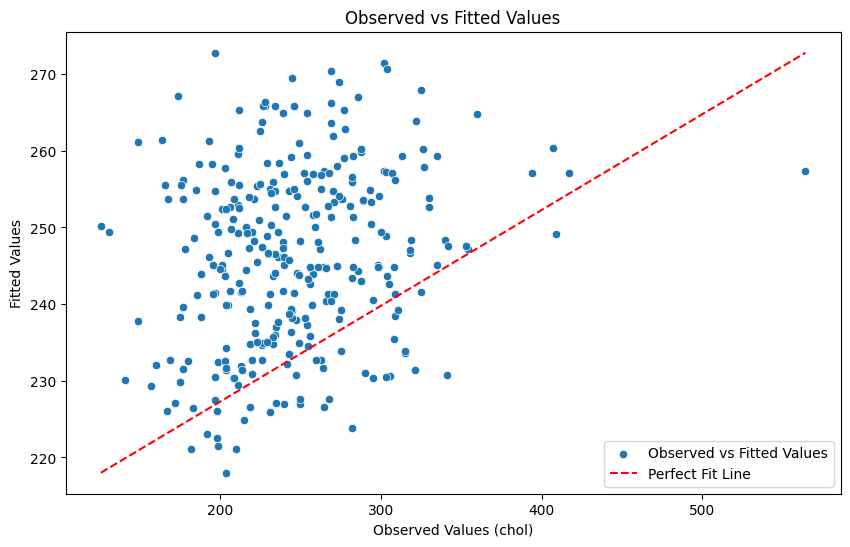

In [49]:
# Plot Observed vs Fitted Values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=fitted2, label='Observed vs Fitted Values')

# Plot Perfect Fit Line

plt.plot([min(y), max(y)], [min(fitted2), max(fitted2)], color='red', linestyle='--', label='Perfect Fit Line')

plt.xlabel('Observed Values (chol)')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.legend()
plt.show()

In [43]:
# check multicollinearity using VIF

vif_data = pd.DataFrame()
vif_data["Variable"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Print the VIF values
print("VIF Values:")
print(vif_data)

VIF Values:
   Variable        VIF
0     const  75.520839
1  trestbps   1.109851
2       age   1.090926
3       fbs   1.038524


In [44]:
# assess the linearity of the relationship

stat, p_value = linear_rainbow(results2)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.8190767349706687, p-value=0.8884813641529837


Shapiro-Wilk Test: W=0.9516533017158508, p-value=1.9237049286857655e-08


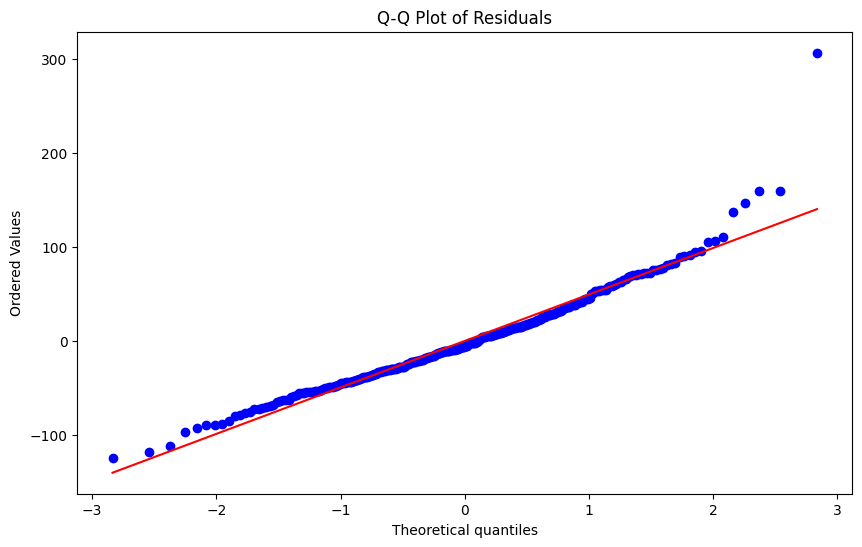

In [50]:
# Residuals
residuals2 = results2.resid

# Assess normality of residuals using Shapiro-Wilk test
W, p_value = shapiro(residuals2)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
probplot(residuals2, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [51]:
# Assess the homogeneity of variance of the residuals

gq_test2 = het_goldfeldquandt(residuals2, results2.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test2[0]}, p-value={gq_test2[1]}")

Goldfeld-Quandt Test: F-statistic=0.9224324677073714, p-value=0.6876466433966697


## checking assumptions:

### - the objective here was to see the impact of resting blood pressure, age, and fasting blood sugar on cholesterol.

### - OLS regression results:

#### - the R-squared value is low being only 0.051. R-squared value ranges from 0 to 1, where 0 indicates that the model explains none of the variance, and 1 indicates that the model explains all of the variance. Since the value we got is only 0.051, it is safe to infere the independent variables cannot be readily correlated to the dependent variable.

#### - The F-stat was 5.307. A significant F-statistic (with a low p-value) indicates that the model is statistically significant. Not all the p-values were less than 0.05. 2 out of the 4 were significantly greater than 0.0.05. Thus, the F-stat was not significant. Due to this, it can be infered that the independent variable is not a significant contributing factor in explaining the variance in the dependent variable.

#### - The regression line represents the best-fit line through the data points. The line showed for the simple linear regression has a poor fit which means that the relationship between the variables is not linear and thus, might have no correlation

#### - The Shapiro-Wilk test is a statistical test used to determine if a given sample comes from a normally distributed population. Since the p-value was 1.923, we reject the alternate hypothesis that resting blood pressure has an effect on cholesterol. Same with the homogeneity test. The p-value given was 0.888 which is also significantly greater than 0.05 which means we accept the null hypthesis that resting blood pressure has no effect on cholesterol

#### - A Q-Q plot is a graphical tool used to assess whether a dataset follows a particular theoretical distribution, such as the normal distribution. Since the Q-Q plot approximately fall along a straight line, it suggests that the data is close to the distribution being compared to. However, although it can be said that resting blood pressure is close to the distribution of cholesterol, that is where the correlation ends. All the other test have disproven any other relations among the two variables.

